In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
path =  'C:\Users\Charlie2\Documents\pubg stat' #"C:\Users\\xruns\Documents\pubg2"
filename_sample = path + '\\sample_submission_V2.csv'
filename_test = path + '\\test_V2.csv'
filename_train = path + '\\train_V2.csv'
#test_data = pd.read_csv(filename_test)

In [42]:
# REMEMBER to add the engineered features to the test set as well

In [43]:
filename_train

'C:\\Users\\Charlie2\\Documents\\pubg stat\\train_V2.csv'

In [44]:
train_data= pd.read_csv(filename_train)

In [45]:
train_data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [46]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [47]:
# Let's start validating data by making sure every player placed at the end of the match
# Let's check for a row with a NaN value in that column.
train_data[train_data['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [48]:
# Dropping that illegal match with only one player from the dataset.
train_data.dropna(subset=['winPlacePerc'], inplace=True)

In [49]:
# Confirming the player is gone.
train_data.iloc[2744604:2744604+1]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744605,13521e925ce4ba,763e2f8deb3218,db4c00dd656acb,0,1,24.85,0,0,0,50,...,0,0.0,0,0.0,0,0,1288.0,3,0,0.7917


# Normalizing features

In [50]:
# A game in PUBG can have up to 100 players fighting each other, but most of the times a game isn't "full" at 100. 
# There is no variable that gives us the number of players who joined the match, but it would be good to create one
# to help normalize the data.
train_data['playersJoined'] = train_data.groupby('matchId')['matchId'].transform('count')

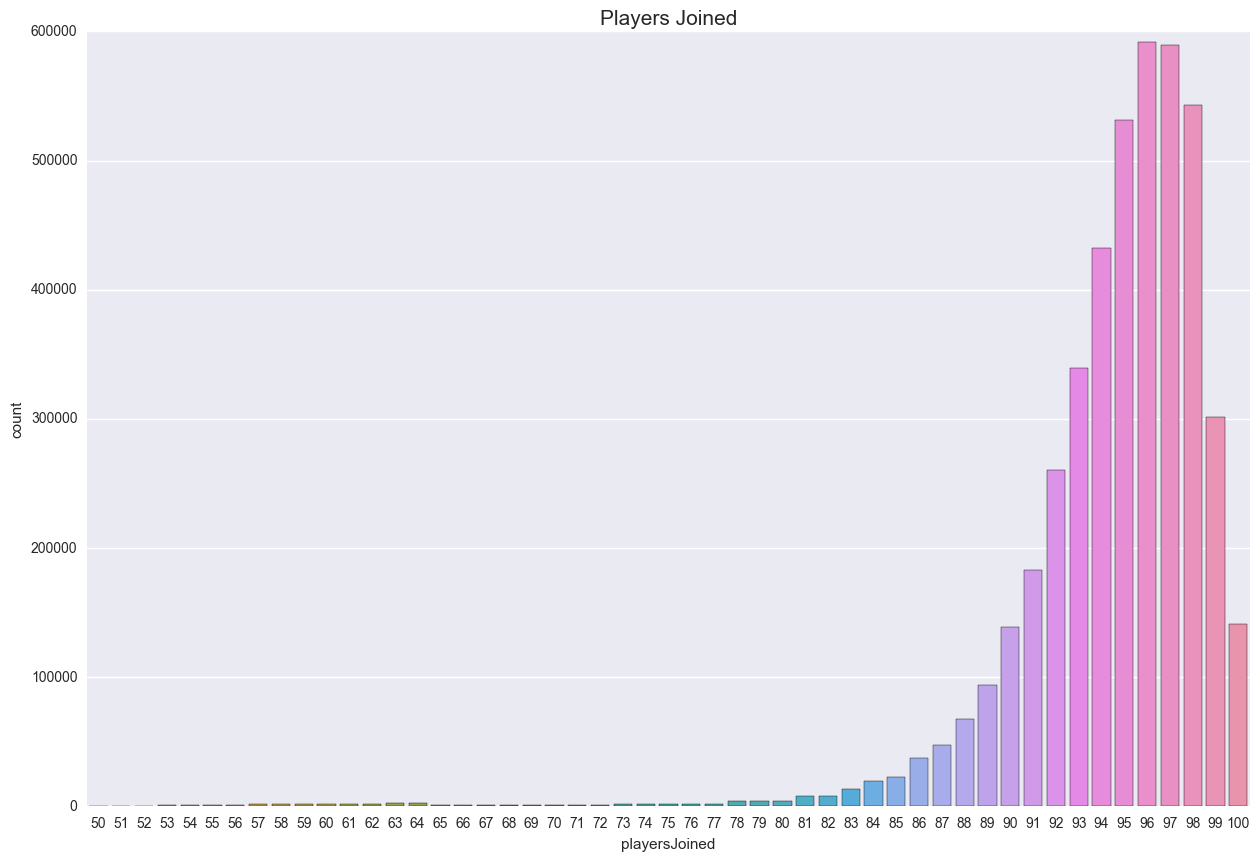

In [51]:
data = train_data.copy()
data = data[data['playersJoined']>49]
plt.figure(figsize=(15,10))
sns.countplot(data['playersJoined'])
plt.title("Players Joined",fontsize=15)
plt.show()

In [52]:
# We need to figure out how to standardize the data, each match has a different number of players,
# so we should normalize other features based on the amount of players.
# Based on the "playersJoined" feature we can create (or change) a lot of others to normalize their values. 
# For example we can, create the "killsNorm" and "damageDealtNorm" features. 
# When there are 100 players in the game it might be easier to find and kill someone, than when there are 90 players. 
# So we can normalize the kills in a way that a kill in 100 players will score 1 (as it is) and in 90 players it will 
# score (100-90)/100 + 1 = 1.1. This is just an assumption and different scales could be used.

train_data['killsNormalized'] = train_data['kills']*((100-train_data['playersJoined'])/100 + 1)
train_data['damageDealtNormalized'] = train_data['damageDealt']*((100-train_data['playersJoined'])/100 + 1)
train_data[['playersJoined', 'kills', 'killsNormalized', 'damageDealt', 'damageDealtNormalized']][5:8]

,playersJoined,kills,killsNormalized,damageDealt,damageDealtNormalized
5,95,1,1.05,100.000,105.00000
6,97,0,0.00,0.000,0.00000
7,96,0,0.00,8.538,8.87952


In [53]:
train_dummy = train_data
#train_dummy.groupby(['matchId']).mean()
playerCount = train_dummy.groupby(['matchId']).count()
playerCount = playerCount["Id"].values
n, bins, patches = plt.hist(playerCount, bins=100)
bins

array([   2.  ,    2.98,    3.96,    4.94,    5.92,    6.9 ,    7.88,
          8.86,    9.84,   10.82,   11.8 ,   12.78,   13.76,   14.74,
         15.72,   16.7 ,   17.68,   18.66,   19.64,   20.62,   21.6 ,
         22.58,   23.56,   24.54,   25.52,   26.5 ,   27.48,   28.46,
         29.44,   30.42,   31.4 ,   32.38,   33.36,   34.34,   35.32,
         36.3 ,   37.28,   38.26,   39.24,   40.22,   41.2 ,   42.18,
         43.16,   44.14,   45.12,   46.1 ,   47.08,   48.06,   49.04,
         50.02,   51.  ,   51.98,   52.96,   53.94,   54.92,   55.9 ,
         56.88,   57.86,   58.84,   59.82,   60.8 ,   61.78,   62.76,
         63.74,   64.72,   65.7 ,   66.68,   67.66,   68.64,   69.62,
         70.6 ,   71.58,   72.56,   73.54,   74.52,   75.5 ,   76.48,
         77.46,   78.44,   79.42,   80.4 ,   81.38,   82.36,   83.34,
         84.32,   85.3 ,   86.28,   87.26,   88.24,   89.22,   90.2 ,
         91.18,   92.16,   93.14,   94.12,   95.1 ,   96.08,   97.06,
         98.04,   99

In [54]:
print(("Mean player count: %d") % np.mean(playerCount))
print(("Median player count: %d") % np.ma.median(playerCount))
print(("Standard deviation of player count: %d") % np.std(playerCount))

Mean player count: 92
Median player count: 95
Standard deviation of player count: 11


In [55]:
scaledCount = [0]*len(playerCount)
i = 0
for x in playerCount:
    scaledCount[i] = ((x-np.mean(playerCount))/np.std(playerCount))
    i = i + 1
plt.hist(scaledCount, bins=100)
#Normal standardization probably isn't effective

(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   1.30000000e+01,
          2.40000000e+01,   2.00000000e+01,   1.40000000e+01,
          2.40000000e+01,   2.10000000e+01,   1.90000000e+01,
          3.60000000e+01,   5.00000000e+01,   1.05000000e+02,
          1.18000000e+02,   1.32000000e+02,   6.50000000e+01,
          3.10000000e+01,   1.30000000e+01,   1.10000000e+01,
          1.40000000e+01,   1.00000000e+01,   8.00000000e+00,
          8.00000000e+00,   5.00000000e+00,   1.30000000e+01,
          9.00000000e+00,   1.70000000e+01,   4.00000000e+00,
          9.00000000e+00,   6.00000000e+00,   3.00000000e+00,
          1.00000000e+01,   1.40000000e+01,   2.20000000e+01,
          3.10000000e+01,   2.80000000e+01,   4.90000000e+01,
          1.30000000e+01,   1.20000000e+01,   6.00000000e+00,
          1.20000000e+01,   8.00000000e+00,   1.10000000e+01,
          1.60000000e+01,   1.80000000e+01,   1.00000000e+01,
        

# Categorical Variables

In [56]:
# Creating a column that determines if a player won the game or not
train_data['winBinary'] = train_data['winPlacePerc']
def makeDummieVar(winPercent):
    if (winPercent < 1.0):
        winPercent = 0
    else:
        winPercent = 1
    return winPercent

train_data['winBinary'] = train_data['winBinary'].apply(makeDummieVar)
train_data.head(5)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,killsNormalized,damageDealtNormalized,winBinary
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0,244.80,1,1466,0.4444,96,0.00,0.0000,0
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0,1434.00,5,0,0.6400,91,0.00,99.7023,0
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0,161.80,2,0,0.7755,98,0.00,69.3600,0
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0,202.70,3,0,0.1667,91,0.00,35.8610,0
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0,49.75,2,0,0.1875,97,1.03,103.0000,0


In [57]:
np.unique(train_data['matchType'])

array(['crashfpp', 'crashtpp', 'duo', 'duo-fpp', 'flarefpp', 'flaretpp',
       'normal-duo', 'normal-duo-fpp', 'normal-solo', 'normal-solo-fpp',
       'normal-squad', 'normal-squad-fpp', 'solo', 'solo-fpp', 'squad',
       'squad-fpp'], dtype=object)

In [58]:
# To make things less complicated, we should only look at standard matches.
# According to the given information, the standard modes are:
# “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”.
# (The -fpp appeneded means the game forced all players to use a "first-person perspective",
# rather, than giving them the option between first-person and third-person to switch between.)
train_data = train_data[(train_data.matchType == 'solo') | (train_data.matchType == 'duo') |
                        (train_data.matchType == 'squad') | (train_data.matchType == 'solo-fpp') |
                        (train_data.matchType == 'duo-fpp') | (train_data.matchType == 'squad-fpp')]
np.unique(train_data['matchType'])

array(['duo', 'duo-fpp', 'solo', 'solo-fpp', 'squad', 'squad-fpp'], dtype=object)

In [59]:
sample = 5000
train_data = train_data.sample(sample)

In [60]:
# Drop Id column, because it probably won't be useful for our Machine Learning algorithm,
# because the test set contains different Id's
train_data.drop(['Id'], inplace=True, axis=1)

In [61]:
# Need to "One hot encode" the matchType feature to 
# perform “binarization” of the category and include it as a feature to train the model.
# This converts the categorical matchType variable into a form that could be provided to 
# ML algorithms to do a better job in prediction.

train_data = pd.get_dummies(train_data, columns=['matchType'])

In [62]:
# Taking a look at the encoding.
matchType_encoding = train_data.filter(regex='matchType')
matchType_encoding.head()

,matchType_duo,matchType_duo-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
967044,0,0,0,0,1,0
930601,0,0,0,0,1,0
169890,0,0,1,0,0,0
4106692,0,0,0,0,0,1
4365332,0,0,0,0,0,1


In [63]:
# matchId's and groupId's are the other categorical variables. There are a ton of different ones so
# one hot encoding them makes no sense, but there could still be corrleations between them, as one
# match will have different charcteristics than the next, and the same goes for groups, so we should
# categorize them with Pandas.

In [64]:
train_data['groupId'] = train_data['groupId'].astype('category')
train_data['matchId'] = train_data['matchId'].astype('category')

# Get category coding for groupId and matchID
train_data['groupId_cat'] = train_data['groupId'].cat.codes
train_data['matchId_cat'] = train_data['matchId'].cat.codes

# Get rid of old columns
train_data.drop(['groupId', 'matchId'], inplace=True, axis=1)

train_data[['groupId_cat', 'matchId_cat']].head()

,groupId_cat,matchId_cat
967044,3137,4362
930601,3157,655
169890,1000,3750
4106692,4412,3753
4365332,3447,2232


# Feature Selection

In [65]:
# from sklearn.linear_model import LogisticRegression
# logReg = LogisticRegression()

In [66]:
wpp = train_data['winPlacePerc']
train_data.drop(labels=['winPlacePerc'], axis=1,inplace = True)
train_data.insert(36, 'winPlacePerc', wpp)

In [67]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 967044 to 4354560
Data columns (total 37 columns):
assists                  5000 non-null int64
boosts                   5000 non-null int64
damageDealt              5000 non-null float64
DBNOs                    5000 non-null int64
headshotKills            5000 non-null int64
heals                    5000 non-null int64
killPlace                5000 non-null int64
killPoints               5000 non-null int64
kills                    5000 non-null int64
killStreaks              5000 non-null int64
longestKill              5000 non-null float64
matchDuration            5000 non-null int64
maxPlace                 5000 non-null int64
numGroups                5000 non-null int64
rankPoints               5000 non-null int64
revives                  5000 non-null int64
rideDistance             5000 non-null float64
roadKills                5000 non-null int64
swimDistance             5000 non-null float64
teamKills             

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor

# Take sample for debugging and exploration
#sample = 50000
#df_sample = train_data.sample(sample)
df_sample = train_data

In [69]:
df_sample = train_data

In [70]:
# Split sample into training data and target variable
X = df_sample.drop('winPlacePerc', inplace=False, axis=1) #all columns except target.
y = df_sample['winPlacePerc'] # Only target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22,shuffle=True)
print('X_train.shape %s, X_test.shape %s\ny_train.shape %s, y_test.shape %s'%(X_train.shape,X_test.shape,y_train.shape,y_test.shape))



X_train.shape (3500, 36), X_test.shape (1500, 36)
y_train.shape (3500L,), y_test.shape (1500L,)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=False)
# Fit only to the training data
scaler.fit(X_train)
Scaled_X_train = scaler.transform(X_train)
Scaled_X_test = scaler.transform(X_test)


# Running two features selection models to find the top 3 features and finding the time of each

from time import time
from sklearn import preprocessing
from sklearn import utils

#Of the 8 selected values, here we are finidng which features are the most important
array = train_data.values
X = array[:,0:36]
Y = array[:,36]

X = X[:, None]
Y = Y[:, None]

In [72]:
# Metric used for the PUBG competition (Mean Absolute Error (MAE))
from sklearn.metrics import mean_absolute_error

# Function to print the MAE (Mean Absolute Error) score
# This is the metric used by Kaggle in this competition
#def print_score(m : RandomForestRegressor):
 #   res = ['mae train: ', mean_absolute_error(m.predict(X_train), y_train), 
          # 'mae val: ', mean_absolute_error(m.predict(X_valid), y_valid)]
    #if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
#print(res)

In [73]:
from sklearn.ensemble import RandomForestRegressor
# mae is the criteron for the dataset
rfr = RandomForestRegressor(max_depth=500,criterion='mae',
                            max_features=None,n_estimators=75,bootstrap=True,
                            min_samples_leaf=1,n_jobs=1,min_samples_split=2)
rfr.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=500,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [74]:
#print_score(rfr)
res = ['mae train: ', mean_absolute_error(rfr.predict(X_train), y_train), 
           'mae val: ', mean_absolute_error(rfr.predict(X_test), y_test)]
if hasattr(rfr, 'oob_score_'): res.append(rfr.oob_score_)
print(res)

['mae train: ', 0.25423146285714282, 'mae val: ', 0.25111510577777774]


In [75]:
from sklearn.metrics import mean_squared_error, r2_score

In [76]:
y_pred_rfr = rfr.predict(X_test)
# r2_score score: 1 is perfect prediction
rfr_score=r2_score(y_pred=y_pred_rfr,y_true=y_test)
print("Variance score (r2_score): %f"%rfr_score)
print('Model accuracy:%.2f '%(rfr_score*100))

Variance score (r2_score): 0.883661
Model accuracy:88.37 


In [77]:
RFpredictions = pd.DataFrame(data=y_pred_rfr)
frames = [RFpredictions, y_test.reset_index().ix[:,1]]
modelTest = pd.concat(frames, axis=1)
modelTest.columns = ["Random Forest Predicted", "Actual"]
modelTest.head(10)

C:\Users\Charlie2\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


,Random Forest Predicted,Actual
0,0.079565,0.0000
1,0.536459,0.6875
2,0.821248,0.9630
3,0.604904,0.6154
4,0.762304,0.8000
5,0.280073,0.2917
6,0.181584,0.1364
7,0.822052,0.7200
8,0.278768,0.2593
9,0.763428,0.6897


In [105]:
indices
featureNames = [0] * 36
for f in range(len(indices)):
    featureNames[f] = list(train_data)[indices[f]]

Feature ranking:
1. walkDistance (0.532441)
2. killPlace (0.186905)
3. matchDuration (0.026644)
4. playersJoined (0.023793)
5. numGroups (0.023720)
6. groupId_cat (0.020244)
7. matchId_cat (0.018659)
8. winBinary (0.017282)
9. maxPlace (0.016891)
10. longestKill (0.012966)
11. rankPoints (0.011365)
12. boosts (0.010998)
13. weaponsAcquired (0.010447)
14. damageDealtNormalized (0.010401)
15. damageDealt (0.009523)
16. winPoints (0.007934)
17. rideDistance (0.007869)
18. killPoints (0.007222)
19. heals (0.007119)
20. DBNOs (0.006882)
21. killsNormalized (0.006557)
22. assists (0.002859)
23. matchType_squad (0.002684)
24. revives (0.002575)
25. killStreaks (0.002212)
26. swimDistance (0.002166)
27. headshotKills (0.001886)
28. matchType_squad-fpp (0.001829)
29. kills (0.001783)
30. matchType_duo-fpp (0.001483)
31. matchType_duo (0.001347)
32. teamKills (0.000962)
33. matchType_solo (0.000875)
34. matchType_solo-fpp (0.000853)
35. roadKills (0.000341)
36. vehicleDestroys (0.000284)


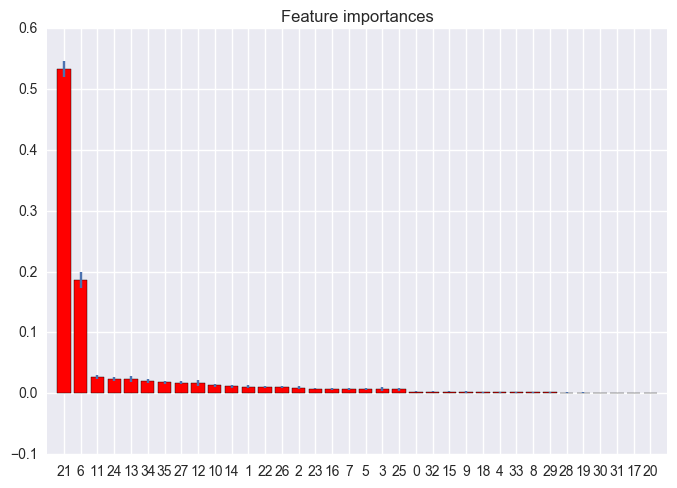

In [100]:
importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, featureNames[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
#idk if scaling the data is right, so ill take it out

In [149]:
model_rfe = LogisticRegression()
rfe = RFE(model_rfe, 1)
X_train_int = X_train.astype('int')
y_train_int = (y_train * 100).astype('int')
fit = rfe.fit(X_train_int,y_train_int)
#print(("Num Features: %d") % fit.n_features_)
#print(("Selected Features: %s") % fit.support_)


Num Features: 5
Selected Features: [False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False  True False False  True  True False False]
Feature Ranking, From Recursive Feature Elimination: [ 8  1 22 14  7 15 21 28 13 11 24 30 18 19 27  5 25 10 17  6 12 29  9 26 20
 16 23  1  2  1  4  3  1  1 31 32]


In [162]:
print("Feature Ranking, From Recursive Feature Elimination:")
rfeRanks = pd.DataFrame({'ranking':fit.ranking_,'feature':featureNames})
rfeRanks.sort_values('ranking')
for f in range(X.shape[1]):
    print("%d. %s" % (f + 1, rfeRanks['feature'][f]))

Feature Ranking, From Recursive Feature Elimination:
1. walkDistance
2. killPlace
3. matchDuration
4. playersJoined
5. numGroups
6. groupId_cat
7. matchId_cat
8. winBinary
9. maxPlace
10. longestKill
11. rankPoints
12. boosts
13. weaponsAcquired
14. damageDealtNormalized
15. damageDealt
16. winPoints
17. rideDistance
18. killPoints
19. heals
20. DBNOs
21. killsNormalized
22. assists
23. matchType_squad
24. revives
25. killStreaks
26. swimDistance
27. headshotKills
28. matchType_squad-fpp
29. kills
30. matchType_duo-fpp
31. matchType_duo
32. teamKills
33. matchType_solo
34. matchType_solo-fpp
35. roadKills
36. vehicleDestroys


In [150]:
for f in range(len(fit.support_)):
    if fit.support_[f] == True:
        print featureNames[f]

killPlace
matchType_squad-fpp
matchType_duo-fpp
matchType_solo
matchType_solo-fpp


Automatically created module for IPython interactive environment
Optimal number of features : 32


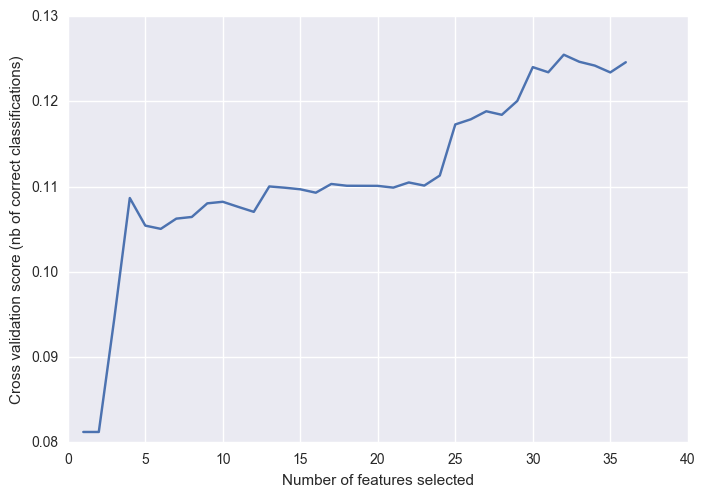

In [151]:
print(__doc__)

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

X_int = X.astype('int')
y_int = (y * 100).astype('int')

# Create the RFE object and compute a cross-validated score.
#svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(model_rfe, step=1, cv=StratifiedKFold(3),
              scoring='accuracy')
rfecv.fit(X_int,y_int)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [140]:
for f in range(len(fit.ranking_)):
    if fit.ranking_[f] == 1:
        print featureNames[f]

matchType_squad-fpp
kills
matchType_duo-fpp
teamKills
matchType_solo-fpp
